# 시각화 탐색 실습

## 1. 필요 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {'axes.unicode_minus':False})

## 2. 데이터셋 생성

|컬럼명|내용|인자|자료형(data type)|
|------|---|---|---|
|total bill|총 계산 요금 (달러)|3.07~50.81|실수(float)|
|tip|팁 (달러)|1.0~10.0|실수(float)|
|sex|성별|Male / Female|문자열(str)|
|smoker|흡연 여부|Yes / No|문자열(str)|
|day|요일|Thur, Fri, Sat, Sun|문자열(str)|
|time|식사 시간|Lunch, Dinner|문자열(str)|
|size|식사 인원|1~6|정수(int)|

In [2]:
# tips data 로드
data = sns.load_dataset('tips')

## 3. 시각화 탐색

 ### 1) 상자그림(Box Plot)
 - 사분위수를 계산하여, 최대/최소값을 벗어나는 이상값 시각화

In [3]:
# 백분위수 계산
print(data['tip'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
print('\n')

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data['tip'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

0.05    1.4400
0.25    2.0000
0.50    2.9000
0.75    3.5625
0.95    5.1955
Name: tip, dtype: float64


     5.0%  25.0%  50.0%   75.0%   95.0%
tip  1.44    2.0    2.9  3.5625  5.1955


Text(0, 0.5, '달러($)')

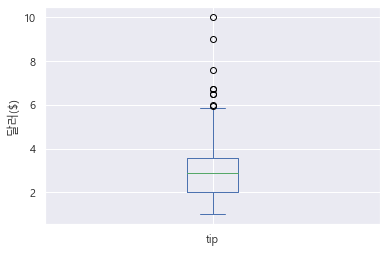

In [4]:
# 한 변수에 대한 이상값 시각화
ax = (data['tip']).plot.box()
ax.set_ylabel('달러($)')

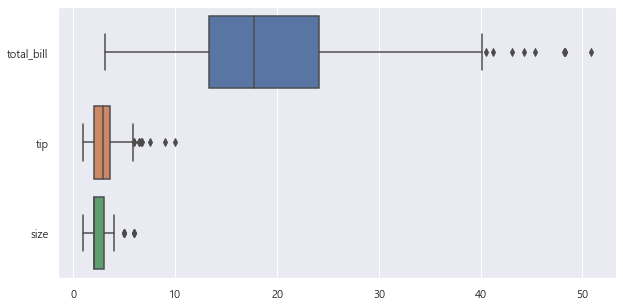

In [5]:
# 상자그림을 이용한 전체 변수의 이상값 확인
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, orient = 'h')
plt.show()

### 2) 막대그래프(Bar Chart)
- 사물의 양을 막대 모양의 길이로 나타낸 그래프

In [6]:
# 요일별 tip 비교
tips_sum_day = data.groupby('day').tip.sum()
tips_sum_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

<BarContainer object of 4 artists>

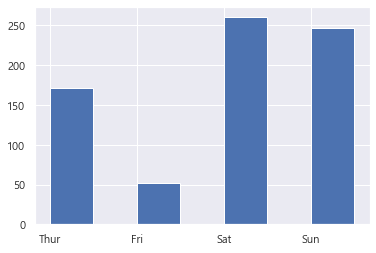

In [7]:
# matplotlib 막대 그래프 시각화
label = ['Thur', 'Fri', 'Sat', 'Sun']
plt.bar(label, tips_sum_day, width=0.5, align='edge')

<AxesSubplot:xlabel='sex', ylabel='tip'>

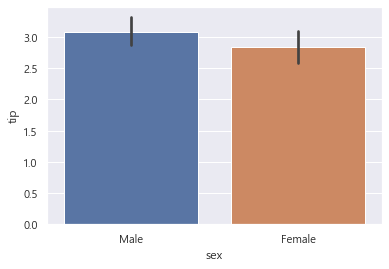

In [8]:
# seaborn 막대 그래프 시각화
# 성별, 평균 팁 비교
sns.barplot(data = data, x = 'sex', y = 'tip')

<AxesSubplot:xlabel='sex', ylabel='tip'>

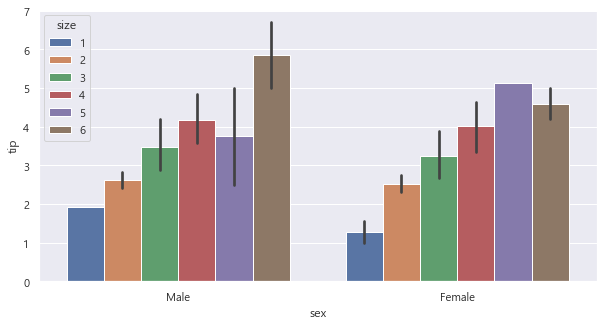

In [9]:
# 식사 인원별 남성과 여성 tip 평균 비교
# 여러 열에서 집단 묶어서 세부 집단 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x = 'sex', y = 'tip', hue = 'size')

### 3) 도수분포표 & 히스토그램
- pd.cut(): 연속된 수치를 구간으로 나누어 카테고리화할 때 사용

In [10]:
# 도수분포표
# 총 계산 금액 구간별 빈도수
bin_total = pd.cut(data['total_bill'], 8)
bin_total.value_counts()

(15.005, 20.972]    81
(9.038, 15.005]     68
(20.972, 26.94]     38
(26.94, 32.908]     24
(3.022, 9.038]      12
(32.908, 38.875]    10
(38.875, 44.842]     6
(44.842, 50.81]      5
Name: total_bill, dtype: int64

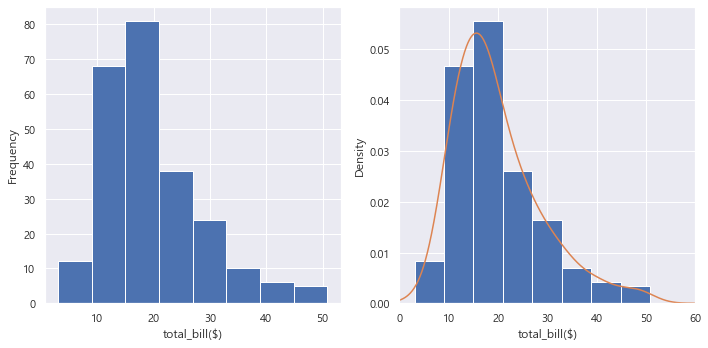

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# 히스토그램
ax1 = plt.subplot(1, 2, 1)
ax1 = (data['total_bill']).plot.hist(bins=8)
ax1.set_xlabel('total_bill($)')

# 밀도그림
plt.subplot(1, 2, 2)
ax2 = data['total_bill'].plot.hist(density=True, xlim=[0, 60], bins=8)
data['total_bill'].plot.density(ax=ax2)
ax2.set_xlabel('total_bill($)')

plt.tight_layout()
plt.show()